# Natural Language Understanding 

## Data Cleaning

*Generic Data cleaning steps to take:*

**1. Converting text to lower case** 
* if your data is case insensitive, you'll need to consider your usecase as well
* some exceptions, if there're acronyms, which may lose their meaning if converted to word, e.g. in german language, MIT (university) vs mit (german for with)

**2. Removing punctuations**
* exceptions, twitter data, where punctuations may be good in showing sentiment

**3. Removing any numerical values**

**4. Tokenize text**
* different ways to tokenize the text

**5. Remove stop words**
* stop words can be altered to be usecase specific, 
* e.g. adding restaurant name to list of stopwords for restaurant review, as the people will usually give the restaurant name in the review
* e.g. twitter you may want to add words like 'RT' 'Retweet' etc for tweets


**6. Stemming / lemmatization** 
* different variation of words due to suffix, but the meaning of the word is the same, use of the word is identical, to prevent duplication of words being stored and improve efficiency
* lemmatization result is a proper word, unlike stemming


**7. Parts of speech tagging**
* good for identifying, summarising, to get e.g. retrieval of nouns from large pieces of texts (NNP)

**8. Create bi-grams or tri-grams**

**9. Deal with typos and spelling mistakes**

Natural Language Toolkit (nltk) : https://www.nltk.org/index.html

In [0]:
#!pip install nltk
#nltk.download()

In [0]:
import nltk
from nltk.book import *


In [0]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [0]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


In [0]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [0]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize,wordpunct_tokenize, TweetTokenizer,RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics #accuracy calculation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

## Tokenisation

Taking a text or set of text and breaking it up into smaller tokens, this could be a sentence,  bigram (n-grams), word, character etc. A token is a single entity.

There are different methods to tokenise text:

https://www.nltk.org/api/nltk.tokenize.html

### Sentence Tokeniser

In [0]:
text="""'Welcome Mr. Smith' she said. 'I had not heard that folk of the Shire were so sweet-tongued. 
But I see that you are an Elf-friend; the light in your eyes and the ring in your voice tells it. 
This is a merry meeting! Sit now, and wait for the Master of the house! He will not be long. 
He is tending your tired beasts.'"""

#excerpt taken from Lord of the Rings
tokenized_text = sent_tokenize(text)
for i in tokenized_text:
    print(i)

'Welcome Mr. Smith' she said.
'I had not heard that folk of the Shire were so sweet-tongued.
But I see that you are an Elf-friend; the light in your eyes and the ring in your voice tells it.
This is a merry meeting!
Sit now, and wait for the Master of the house!
He will not be long.
He is tending your tired beasts.'


### *Word Tokeniser

In [0]:
tokenized_word = word_tokenize(text)
for i in tokenized_word:
    print(i)

'Welcome
Mr.
Smith
'
she
said
.
'
I
had
not
heard
that
folk
of
the
Shire
were
so
sweet-tongued
.
But
I
see
that
you
are
an
Elf-friend
;
the
light
in
your
eyes
and
the
ring
in
your
voice
tells
it
.
This
is
a
merry
meeting
!
Sit
now
,
and
wait
for
the
Master
of
the
house
!
He
will
not
be
long
.
He
is
tending
your
tired
beasts
.
'


### *Tweet Tokeniser

In [0]:
tokeniser = TweetTokenizer()
tweet = "This is a cooool #hashtag1 @someone #dummysmiley: :) :-) :-P <3 and some arrows < > -> <--"
tokenized_tweet = tokeniser.tokenize(tweet)
for i in tokenized_tweet:
    print(i)

This
is
a
cooool
#hashtag1
@someone
#dummysmiley
:
:)
:-)
:-P
<3
and
some
arrows
<
>
->
<--


In [0]:
tokenized_tweet_v2 = word_tokenize(tweet)
for i in tokenized_tweet_v2:
    print(i)

This
is
a
cooool
#
hashtag1
@
someone
#
dummysmiley
:
:
)
:
-
)
:
-P
<
3
and
some
arrows
<
>
-
>
<
--


# Basic Exploratory Data Analysis (EDA)

### Frequency Distribution
From nltk, this runs on an array of tokens (created by the tokeniser above)
The purpose is to find the frequency of the tokens across the document

In [0]:
len(tokenized_word)

76

In [0]:
len(set(tokenized_word))

55

In [0]:
freqdist = FreqDist(tokenized_word)
print(freqdist)

<FreqDist with 55 samples and 76 outcomes>


In [0]:
freqdist.keys()

dict_keys(["'Welcome", 'Mr.', 'Smith', "'", 'she', 'said', '.', 'I', 'had', 'not', 'heard', 'that', 'folk', 'of', 'the', 'Shire', 'were', 'so', 'sweet-tongued', 'But', 'see', 'you', 'are', 'an', 'Elf-friend', ';', 'light', 'in', 'your', 'eyes', 'and', 'ring', 'voice', 'tells', 'it', 'This', 'is', 'a', 'merry', 'meeting', '!', 'Sit', 'now', ',', 'wait', 'for', 'Master', 'house', 'He', 'will', 'be', 'long', 'tending', 'tired', 'beasts'])

In [0]:
freqdist.values()

dict_values([1, 1, 1, 3, 1, 1, 5, 2, 1, 2, 1, 2, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [0]:
freqdist['merry']

1

In [0]:
freqdist.most_common(10)

[('.', 5),
 ('the', 5),
 ("'", 3),
 ('your', 3),
 ('I', 2),
 ('not', 2),
 ('that', 2),
 ('of', 2),
 ('in', 2),
 ('and', 2)]

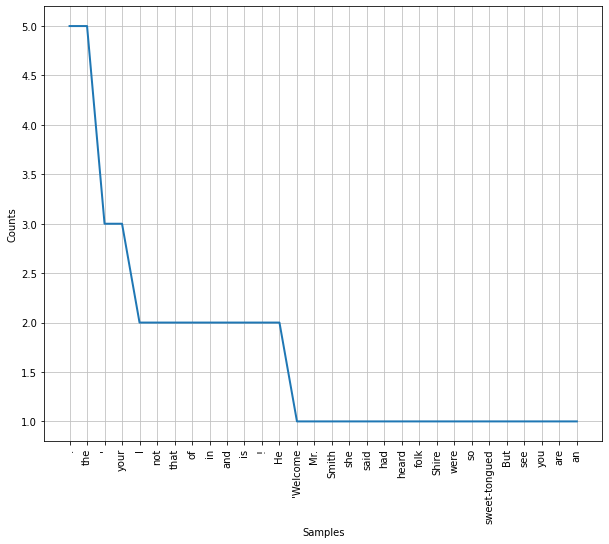

In [0]:
# Frequency Distribution Plot
freqdist.plot(30,cumulative=False)
plt.show()

## Stopwords

In [0]:
stop_words = stopwords.words("english")
#/Users/laishumin/nltk_data/corpora/stopwords/english

print(stop_words)
stop_words.append('Retweet')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
filtered_sent=[]

for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
        
print("Tokenized Sentence:",tokenized_word)
print('\n')
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ["'Welcome", 'Mr.', 'Smith', "'", 'she', 'said', '.', "'", 'I', 'had', 'not', 'heard', 'that', 'folk', 'of', 'the', 'Shire', 'were', 'so', 'sweet-tongued', '.', 'But', 'I', 'see', 'that', 'you', 'are', 'an', 'Elf-friend', ';', 'the', 'light', 'in', 'your', 'eyes', 'and', 'the', 'ring', 'in', 'your', 'voice', 'tells', 'it', '.', 'This', 'is', 'a', 'merry', 'meeting', '!', 'Sit', 'now', ',', 'and', 'wait', 'for', 'the', 'Master', 'of', 'the', 'house', '!', 'He', 'will', 'not', 'be', 'long', '.', 'He', 'is', 'tending', 'your', 'tired', 'beasts', '.', "'"]


Filterd Sentence: ["'Welcome", 'Mr.', 'Smith', "'", 'said', '.', "'", 'I', 'heard', 'folk', 'Shire', 'sweet-tongued', '.', 'But', 'I', 'see', 'Elf-friend', ';', 'light', 'eyes', 'ring', 'voice', 'tells', '.', 'This', 'merry', 'meeting', '!', 'Sit', ',', 'wait', 'Master', 'house', '!', 'He', 'long', '.', 'He', 'tending', 'tired', 'beasts', '.', "'"]


## Stemming & Lemmatization

In [0]:
#Porter Stemmer (simple + speed), fast recall and fetching queries; 5 main rules, step by step, no lookup table, but follows algorithmic rules
#snowball stemmers 
#lancaster stemmer; iterative algorithms, and over stemming may occur;
#faster than lemmatization

#lemma, detailed dictionaries to link form back to lemma; 
# needs lookup + pos
#language impt, use this, as corpus used to map root forms

#applications --> sentiment analysis (text preparation),information retrieval, to map documents to topics

In [0]:
#Lexicon Normalization
#performing stemming and Lemmatization

lem = WordNetLemmatizer()
#wordnet database to lookup words, lemma needs to have part of speech provided

stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [0]:
print("Lemmatized Word:",lem.lemmatize('better',"a"))
# default pos = noun
# better than stemming? group more words together, better job than stemming


Lemmatized Word: good


In [0]:
words = ['application', 'applying', 'applies', 'applied', 'apply', 'apples', 'apple']

for i in words:
    print(i, '\n','Stemming:', stem.stem(i), 'Lemmatizing:', lem.lemmatize(i, 'v'))

application 
 Stemming: applic Lemmatizing: application
applying 
 Stemming: appli Lemmatizing: apply
applies 
 Stemming: appli Lemmatizing: apply
applied 
 Stemming: appli Lemmatizing: apply
apply 
 Stemming: appli Lemmatizing: apply
apples 
 Stemming: appl Lemmatizing: apples
apple 
 Stemming: appl Lemmatizing: apple


In [0]:
word_list = ['python', 'pythoned', 'pythoner', 'pythonly', 'pythoning']

In [0]:
for i in word_list:
    print(stem.stem(i), lem.lemmatize(i))


python python
python pythoned
python pythoner
pythonli pythonly
python pythoning


## Part of Speech Tagging

In [0]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens = nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [0]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

In [0]:
#!pip install wikipedia

In [0]:
import wikipedia as wiki

In [0]:
shopee = wiki.summary('Shopee')

In [0]:
shopee_tok = word_tokenize(shopee)

In [0]:
nltk.pos_tag(shopee_tok)


[('Shopee', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('Singaporean', 'JJ'),
 ('e-commerce', 'NN'),
 ('platform', 'NN'),
 ('headquartered', 'VBN'),
 ('under', 'IN'),
 ('the', 'DT'),
 ('Sea', 'NNP'),
 ('Group', 'NNP'),
 ('(', '('),
 ('previously', 'RB'),
 ('known', 'VBN'),
 ('as', 'IN'),
 ('Garena', 'NNP'),
 (')', ')'),
 (',', ','),
 ('which', 'WDT'),
 ('was', 'VBD'),
 ('founded', 'VBN'),
 ('in', 'IN'),
 ('2015', 'CD'),
 ('by', 'IN'),
 ('Forrest', 'NNP'),
 ('Li', 'NNP'),
 ('.', '.'),
 ('Shopee', 'NNP'),
 ('first', 'RB'),
 ('launched', 'VBD'),
 ('in', 'IN'),
 ('Singapore', 'NNP'),
 ('in', 'IN'),
 ('2015', 'CD'),
 (',', ','),
 ('and', 'CC'),
 ('since', 'IN'),
 ('expanded', 'VBN'),
 ('its', 'PRP$'),
 ('reach', 'NN'),
 ('to', 'TO'),
 ('Malaysia', 'NNP'),
 (',', ','),
 ('Thailand', 'NNP'),
 (',', ','),
 ('Taiwan', 'NNP'),
 (',', ','),
 ('Indonesia', 'NNP'),
 (',', ','),
 ('Vietnam', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('Philippines', 'NNPS'),
 (',', ','),
 ('and', 'CC'),
 ('Brazil', 'NNP'),
 

In [0]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [0]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [0]:
nltk.help.upenn_tagset('PRP$')

PRP$: pronoun, possessive
    her his mine my our ours their thy your


In [0]:
#https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

## Named Entity Recognition

In [0]:
namedEnt = nltk.ne_chunk(nltk.pos_tag(shopee_tok))
namedEnt.draw()

# Sentiment Analysis - Scikit Learn

Data Source: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
test.tsv contains just phrases. You must assign a sentiment label to each phrase.
The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [0]:
df = pd.read_csv('train.tsv', sep='\t')

In [0]:
df.shape

In [0]:
df.info()

In [0]:
df

In [0]:
df['Phrase']

As was mentioned in the original competition description, there are no individual movie reviews but rather phrases taken out of context and split into smaller parts, each with an assigned sentiment category. The competition is evaluated based on scoring results of each test phrase, so the context of the whole review does not matter here. 

In [0]:
df['Sentiment'].describe()

In [0]:
df.Sentiment.value_counts()

In [0]:
Sentiment_count = df.groupby('Sentiment').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

## Count Vectorizer

In [0]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)

text_counts= cv.fit_transform(df['Phrase'])

In [0]:
df.shape

In [0]:
print(text_counts)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.3, random_state=1)

In [0]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

## TFIDF Vectorizer

In [0]:
tf = TfidfVectorizer()

text_tf = tf.fit_transform(df['Phrase'])

In [0]:
print(text_tf)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Sentiment'], test_size=0.3, random_state=123)

In [0]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

## *Sentiment Analysis - Textblob



1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

In [0]:
#!pip install textblob
from textblob import TextBlob
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
 TextBlob('the weather today is bad :)').sentiment

In [0]:
 TextBlob('the weather today is bad :(').sentiment

In [0]:
 TextBlob('the weather is good').sentiment

In [0]:
 TextBlob('it rained today').sentiment

### Sentiment Analysis on Music Lyrics

In [0]:
def scrape_lyrics(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, "html.parser")
    lyrics = html.find("pre", class_="lyric-body").get_text()
    print(url)
    #print(lyrics)
    return lyrics.replace("\n"," ")


links = ['https://www.lyrics.com/lyric/36863481/Justin+Bieber/Yummy',
     'https://www.lyrics.com/lyric/35362456/Ed+Sheeran/Castle+on+the+Hill',
     'https://www.lyrics.com/lyric/35342586/Taylor+Swift/22',
     'https://www.lyrics.com/lyric/36147543/Kygo/Happy+Now',
     'https://www.lyrics.com/sublyric/58125/Lauv/Superhero',
     'https://www.lyrics.com/lyric/30514737/Fix+You',
     'https://www.lyrics.com/lyric/32981724/One+Direction/Perfect',
     'https://www.lyrics.com/lyric/36489666/Bahari/Crashing',
     'https://www.lyrics.com/lyric/33787626/ROZES/Matches',
     'https://www.lyrics.com/lyric/36341880/Maroon+5/She+Will+Be+Loved',
     'https://www.lyrics.com/lyric/25306933/Queen/Dont+Stop+Me+Now',
     'https://www.lyrics.com/lyric/31781320/Eric+Clapton/Tears+In+Heaven']


lyrics = [scrape_lyrics(link) for link in links]

artists = ['JustinBieber', 'EdSheeran', 'TaylorSwift', 'Kygo', 'Lauv', 'Coldplay', 'OneDirection','Bahari','Rozes','Maroon5', 'Queen', 'EricClapton']

#fun fact: queen dont stop me now is apparently the happiest song, and eric clapton is supposedly a sad song
# https://www.indy100.com/article/dont-stop-me-now-is-the-happiest-song-in-the-world-according-to-a-neuroscientist-7318321
#but there's more to the what affects the sentiment of the song, not just the lyrics, e.g. tempo

In [0]:
df = pd.DataFrame({'Lyrics':lyrics}, index=artists)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Lyrics'].apply(pol)
df['subjectivity'] = df['Lyrics'].apply(sub)

plt.rcParams['figure.figsize'] = [10, 8]

for artist in df.index:
    x = df.polarity.loc[artist]
    y = df.subjectivity.loc[artist]
    plt.scatter(x, y, color='green')
    plt.text(x+.001, y+.001, artist, fontsize=10)
    plt.xlim(-.7, .7) 
    plt.ylim(0,1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ---------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Natural Language Generation

In [0]:
import pandas as pd
import markovify 
import ipywidgets as widgets
from transformers import pipeline

## Markov Chains

In [0]:
#!pip install markovify

In [0]:
import pandas as pd
import markovify 


In [0]:
df_news_headlines = pd.read_csv('abcnews-date-text.csv')
df_news_headlines.head()

In [0]:
text_model = markovify.NewlineText(df_news_headlines.headline_text, state_size = 2)

In [0]:
# Print ten randomly-generated sentences using the built model
for i in range(10):
    print(text_model.make_sentence())

In [0]:
for i in range(10):
    print(text_model.make_short_sentence(1000))

# References and other links

1. https://www.nltk.org/index.html
2. https://github.com/adashofdata
3. https://github.com/adashofdata/nlp-in-python-tutorial
4. https://github.com/jsvine/markovify
5. https://www.twilio.com/blog/2016/09/fun-with-markov-chains-python-and-twilio-sms.html
6. https://github.com/huggingface
7. http://jalammar.github.io/illustrated-transformer/
8. https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf
9. https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
10. https://mccormickml.com/2019/07/22/BERT-fine-tuning/
11. https://huggingface.co/transformers/pretrained_models.html
12. https://huggingface.co/transformers/usage.html
13. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html